In [1]:
from IPython.display import Image

# Grover's Algorithm

Devised by Lov Grover in 1996, Gover's algorithm finds with high probability the unique input that produces a particular output value, using just $O(\sqrt(N))$ evaluations of the function, where $N$ is the size of the function's domain.

Using classical computation the same problem cannot be solved in fewer than $O(N)$ evaluations (because, in the worst case, the $N$-th member of the domain might be the correct member).

You can picture the algorithm in a context of a query in a database. With a Quantum computer, you would be able to find a given object in a database in $O(\sqrt(N))$ time. Using a traditional computer, the same operation would take $O(N)$ time. The quantum-computer is therefore exponentially faster than a traditional computer.

Let us look at a problem in classical computing. Here we have a list of numbers with length N. 

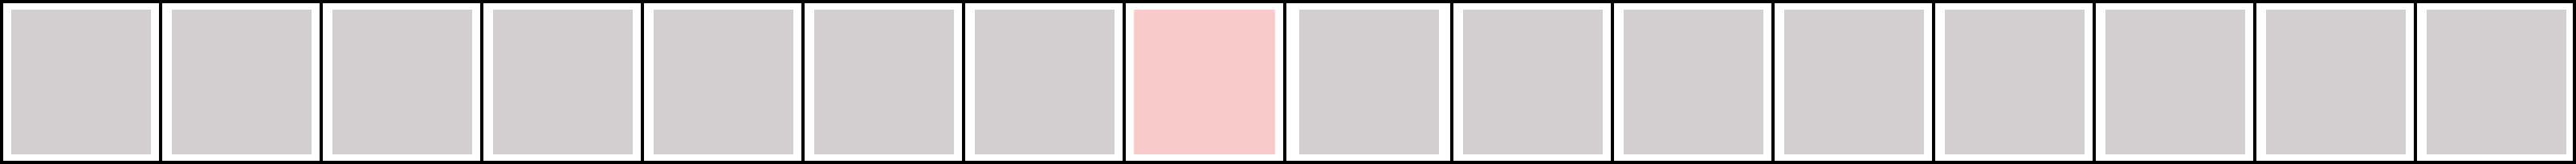

In this case we are trying to find the figure 8. Given a function F we want to give a number "t" as input so as f(t) = 8. 

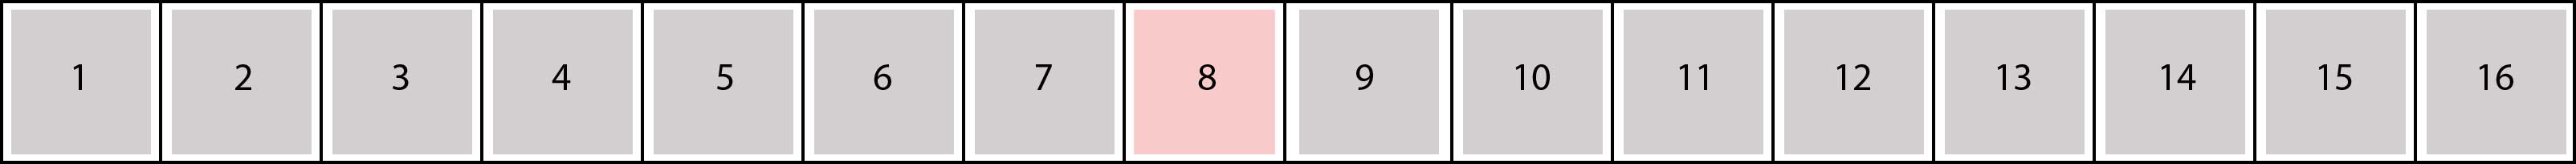

In classical computing there are several ways of doing this. One way is linar search which takes $O(N)$ time.

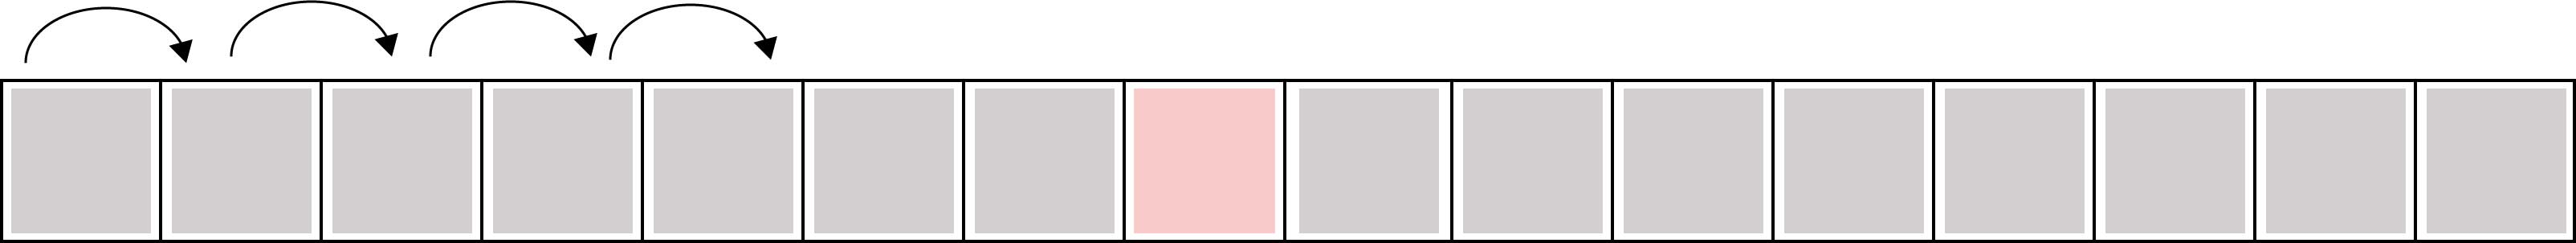

Another more optimised way is the binary search, which in turn takes $O(log_n)$ time.

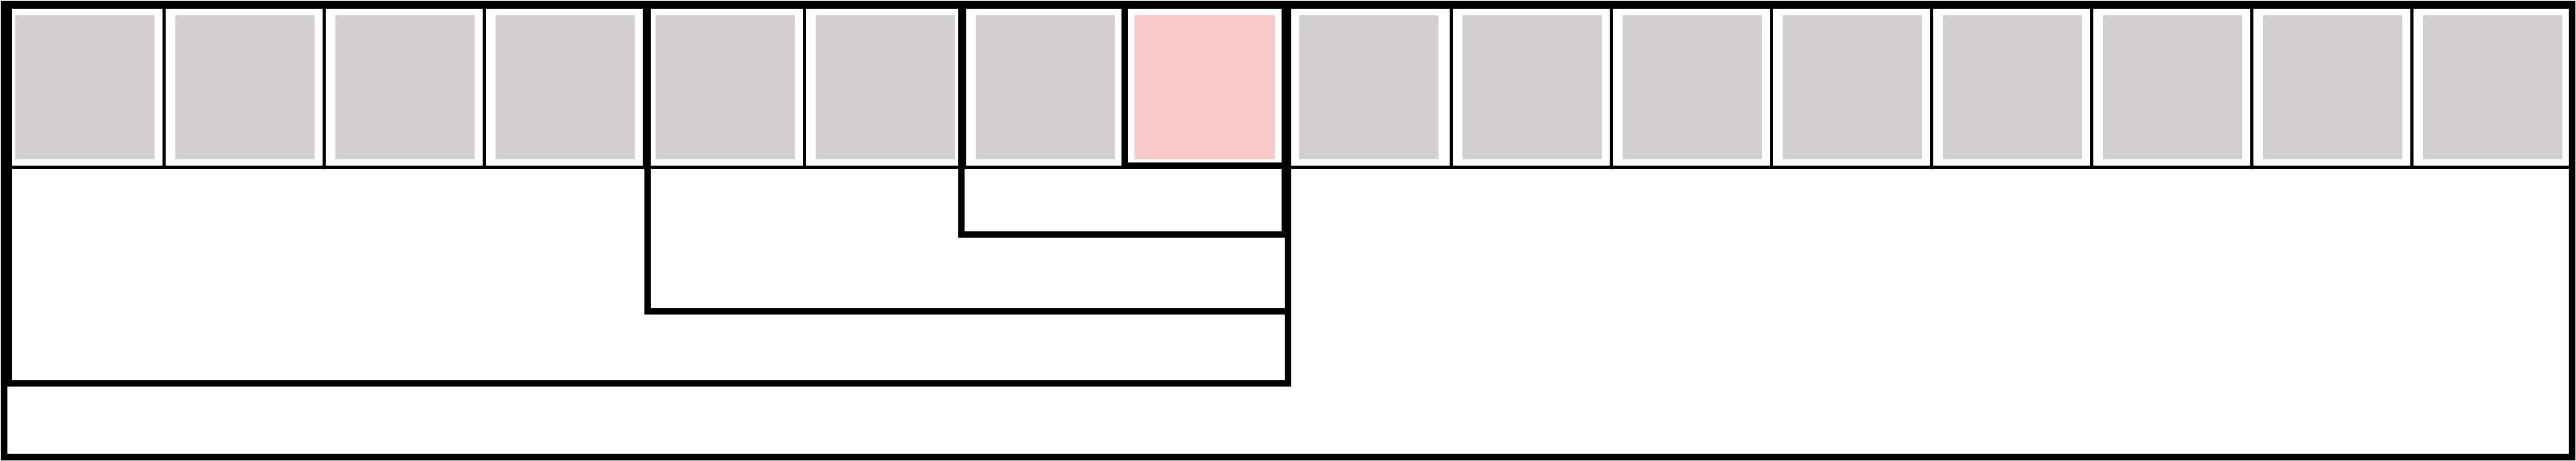

But what if we have an unsorted array, and we want to do it even faster?

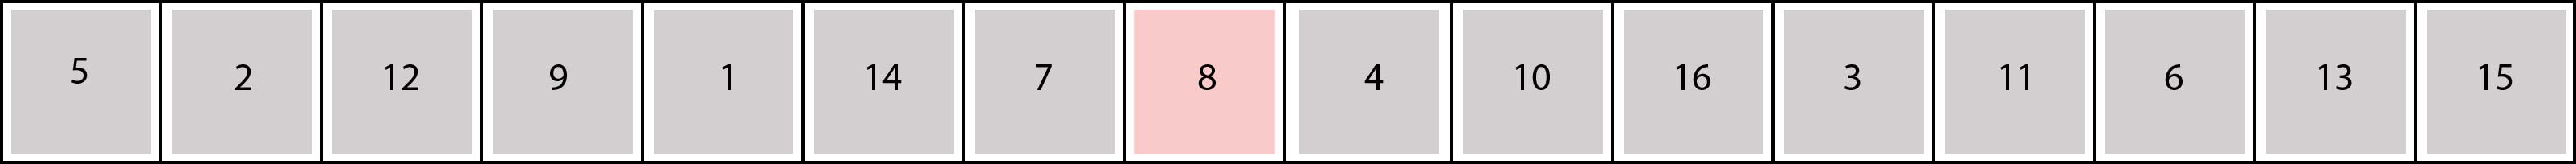

Before we start programming a real quantum computer, we first need to make sure we have all the tools needed.

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

To make quantum computations, we first need to create a quantum circuit.

If you followed the instructions above, you should now know how to run a script in Jupyter. Go ahead and run the next script as well, located below this message:

In [3]:
# Create a Quantum Register with 3 qubits.
qr = QuantumRegister(3,'q1')
# We also need to create a classical register to measure our values
cr = ClassicalRegister(3)
# Create a Quantum Circuit, combining our two registers.
circ = QuantumCircuit(qr,cr)

By running the two previous scripts, you should now have 1.) installed the tools needed to proceed in this notebook, 2.) have created a quantum- and a classical-register.
By running the next script, you will be able to see if everything got installed correctly. The output should be a printout of all our newly created registers:

q1_0: |0>
         
q1_1: |0>
         
q1_2: |0>
         
 c2_0: 0 
         
 c2_1: 0 
         
 c2_2: 0 

In [4]:
circ.draw(output='mpl')

# Oracle function

An oracle function is simply an operation that has some property that you don’t know, and are trying to find out. The term “black box” is used equivalently, to convey the idea that it’s just a box that you can’t see inside. All you know is that you can supply inputs and receive outputs. 

In our example our oracle function only returns true if it receives an input of the binary representation of 6, 110. But you can play around with the oracle yourself. 

Hint: Below we have marked TWO of the X-gates with some comments, by changeing them you can changes what values make the oracle return true. 

In [19]:
#Init
circ.h(qr);
circ.barrier();

#Oracle operator for binary 110
circ.x(qr[0]); # Try changeing this to irc.x(qr[1])
circ.h(qr[2]);
circ.ccx(qr[0],qr[1],qr[2]);
circ.x(qr[0]); # This should always mirror the other X-gate 3 lines above, for Grover's algorithm to work.
circ.h(qr[2]);
circ.barrier();
circ.draw(output='mpl')

Following the oracle we put Grover's algorithm. Also called amplitude purification, because that is what it does, it amplifies the output of the oracle. Because that's the thing about quantum computers, they are never 100% sure about anything.

In [6]:
#Grover
circ.h(qr)
circ.x(qr)
circ.h(qr[2])
circ.ccx(qr[0],qr[1],qr[2])
circ.h(qr[2])
circ.x(qr)
circ.h(qr)
circ.barrier()

#Measure
circ.measure(qr,cr)

#Prepare draw
circ.draw();

This is how the circute above looks like:
See how its seperated into four parts? The first part with the three Hs' is the initialisation phase. This is where we put our qbit into superposition. The next phase is the oracle, followed by Grover's algorithm and finally we meassure each qbit and log the result to our classical register. We discuss the results of the registers a little later.

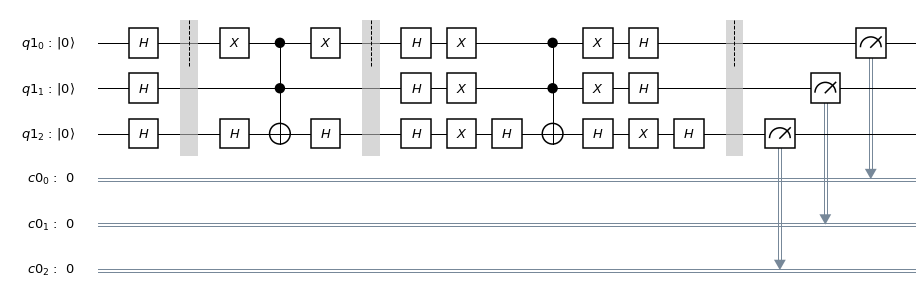

In [7]:
circ.draw(output='mpl')

# Running Grover' algorithm on a Quantum Simulator

Running algorithms on a quantum computer can be very time consuming, depending on the time in which you do it. 
Therefor we suggest that you run your algorithm on a simulater to see the results, and then if you have time to wait, run it on a Quantum Computer.

In [8]:
from qiskit import execute, IBMQ
from qiskit.tools.visualization import plot_histogram

In [9]:
#IBMQ.load_accounts()
device = IBMQ.get_backend('ibmq_qasm_simulator')
result = execute(circ, device ,shots=1024).result()

In [10]:
counts = result.get_counts(circ)

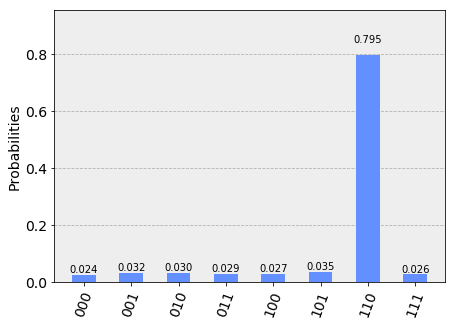

In [11]:
plot_histogram(counts)

# Running Grovers algorithm on a Quantum Computer

In [12]:
from qiskit import IBMQ
#%run credentials.py
# We now save the account so we can use it with IBMQ
#IBMQ.save_account("de8b458767c048db841ebbbc7a7b1bb2a4004c5086812ca496261e6b89f02653814ae8f1db62e5108cd86a2edb6630d101a4df03ab6526de8c7fa55129c5770f")
# And now we register which account we are using.
#IBMQ.load_accounts()

/Users/emilreinert/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [13]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.get_provider()
device = least_busy(provider.backends())
#device = IBMQ.get_backend('ibmq_16_melbourne')

In [14]:
# We excecute the job on the choosen device
job_sim = execute(circ, device,shots=1024)

In [15]:
# The job monitor makes it possible for us to monitor our job in real time
from qiskit.tools.monitor import job_monitor
job_monitor(job_sim)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [16]:
# When the job is done, the results can be showed below.
sim_result = job_sim.result()
counts = sim_result.get_counts(circ)

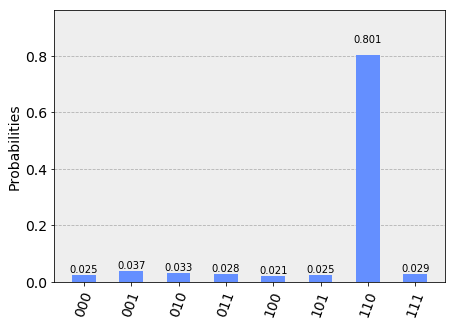

In [17]:
plot_histogram(counts)

In [18]:
counts

{'100': 21,
 '111': 30,
 '000': 26,
 '001': 38,
 '010': 34,
 '110': 820,
 '101': 26,
 '011': 29}